# Initial Setup

2) (145 points) Use numeric prediction techniques to build a predictive model for the HW4.xlsx dataset. This dataset is provided on Canvas and contains data about whether or not different consumers made a purchase in response to a test mailing of a certain catalog and, in case of a purchase, how much money each consumer spent. The data file has a brief description of all the attributes in a separate worksheet. We would like to build predictive models to predict how much will the customers spend; Spending is the target variable (numeric value: amount spent).

Use Python for this exercise. 
Whenever applicable use random state 42 (10 points).


## Libraries 

In [2]:
##################Libraries, Data Import, Cleaning, Exploration##########################

# MAKE SURE YOU RUN "pip install mlxtend --user" in your anaconda prompt or python prompt!!!!!!!!!!!!

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals
from IPython.display import Image
from sklearn import linear_model, neighbors, datasets, metrics, tree, preprocessing, utils        # The sklearn.linear_model module implements generalized linear models. LR is part of this module
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge 
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here https://matplotlib.org/3.1.1/api/colors_api.html
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
import matplotlib
import scipy as sp # sp is an alias pointing to scipy
import numpy as np
import pandas as pd # pd is an alias point to pandas
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler
# StandardScaler Standardize features by removing the mean and scaling to unit variance
# LabelEncoder Encode labels with value between 0 and n_classes-1
# Cross_val_score Evaluate a score by cross-validation

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, cohen_kappa_score,  roc_curve, auc
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda 1
# conda install -c anaconda graphviz 
!pip install graphviz
import itertools
import graphviz
import os
#---------------------
# Seed the generator to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline

# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels
#-----------------
# Matplotlib inline allows the output of plotting commands will be displayed inline
%matplotlib inline    
# Root Directory
PROJECT_ROOT_DIR = "C:\\Users\\carlj\\OneDrive\\Documents\\School-MSBA\\Classes\\Fall\\Intro. to Business Analytics\\HW4"

## Data import

In [3]:
########################################### Imports ###########################################
hw4data = pd.read_excel("HW4.xlsx")#, header=None, names=["id","diagnosis","radius_mean","radius_stderror","radius_worst","texture_mean","texture_stderror","texture_worst","perimeter_mean","perimeter_stderror","perimeter_worst","area_mean","area_stderror","area_worst","smoothness_mean","smoothness_stderror","smoothness_worst","compactness_mean","compactness_stderror","compactness_worst","concavity_mean","concavity_stderror","concavity_worst","concavepoints_mean","concavepoints_stderror","concavepoints_worst","symmetry_mean","symmetry_stderror","symmetry_worst","fractaldimension_mean","fractaldimension_stderror","fractaldimension_worst"]) 
#hw2data.rename(columns={0:"id",1:"diagnosis"},inplace=True)

## Pre-Clean Data Exploration

In [4]:
#Looking at how big our dataset is
hw4data.shape

(2000, 25)

In [5]:
#taking a peek at how the data looks like
hw4data.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [6]:
#looking at any potential problems/outliers
hw4data.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


## Target Variable Distribution Histogram

(array([1.174e+03, 1.590e+02, 3.030e+02, 1.210e+02, 8.000e+01, 4.400e+01,
        3.400e+01, 1.900e+01, 1.400e+01, 1.400e+01, 8.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        2.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00]),
 array([   0.    ,   60.0024,  120.0048,  180.0072,  240.0096,  300.012 ,
         360.0144,  420.0168,  480.0192,  540.0216,  600.024 ,  660.0264,
         720.0288,  780.0312,  840.0336,  900.036 ,  960.0384, 1020.0408,
        1080.0432, 1140.0456, 1200.048 , 1260.0504, 1320.0528, 1380.0552,
        1440.0576, 1500.06  ]),
 <a list of 25 Patch objects>)

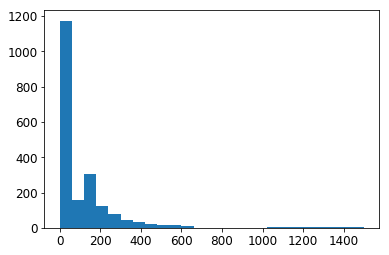

In [106]:
matplotlib.pyplot.hist(hw4data.Spending, bins=25, range=None, density=None, weights=None)

## Data Cleaning

In [7]:
#data cleaning
print(hw4data.isnull().sum())
hw4data.drop(['Purchase','sequence_number'], inplace=True, axis=1)

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64


## Post-Clean Data Exploration

In [8]:
hw4data.shape

(2000, 23)

In [9]:
hw4data.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,127.87
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,127.48
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0.00
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0.00


In [10]:
hw4data.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,0.068500,...,0.006000,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,102.560745
std,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,0.252665,...,0.077246,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,186.749816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,1.855000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,152.532500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1500.060000


## Correlation matrix

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


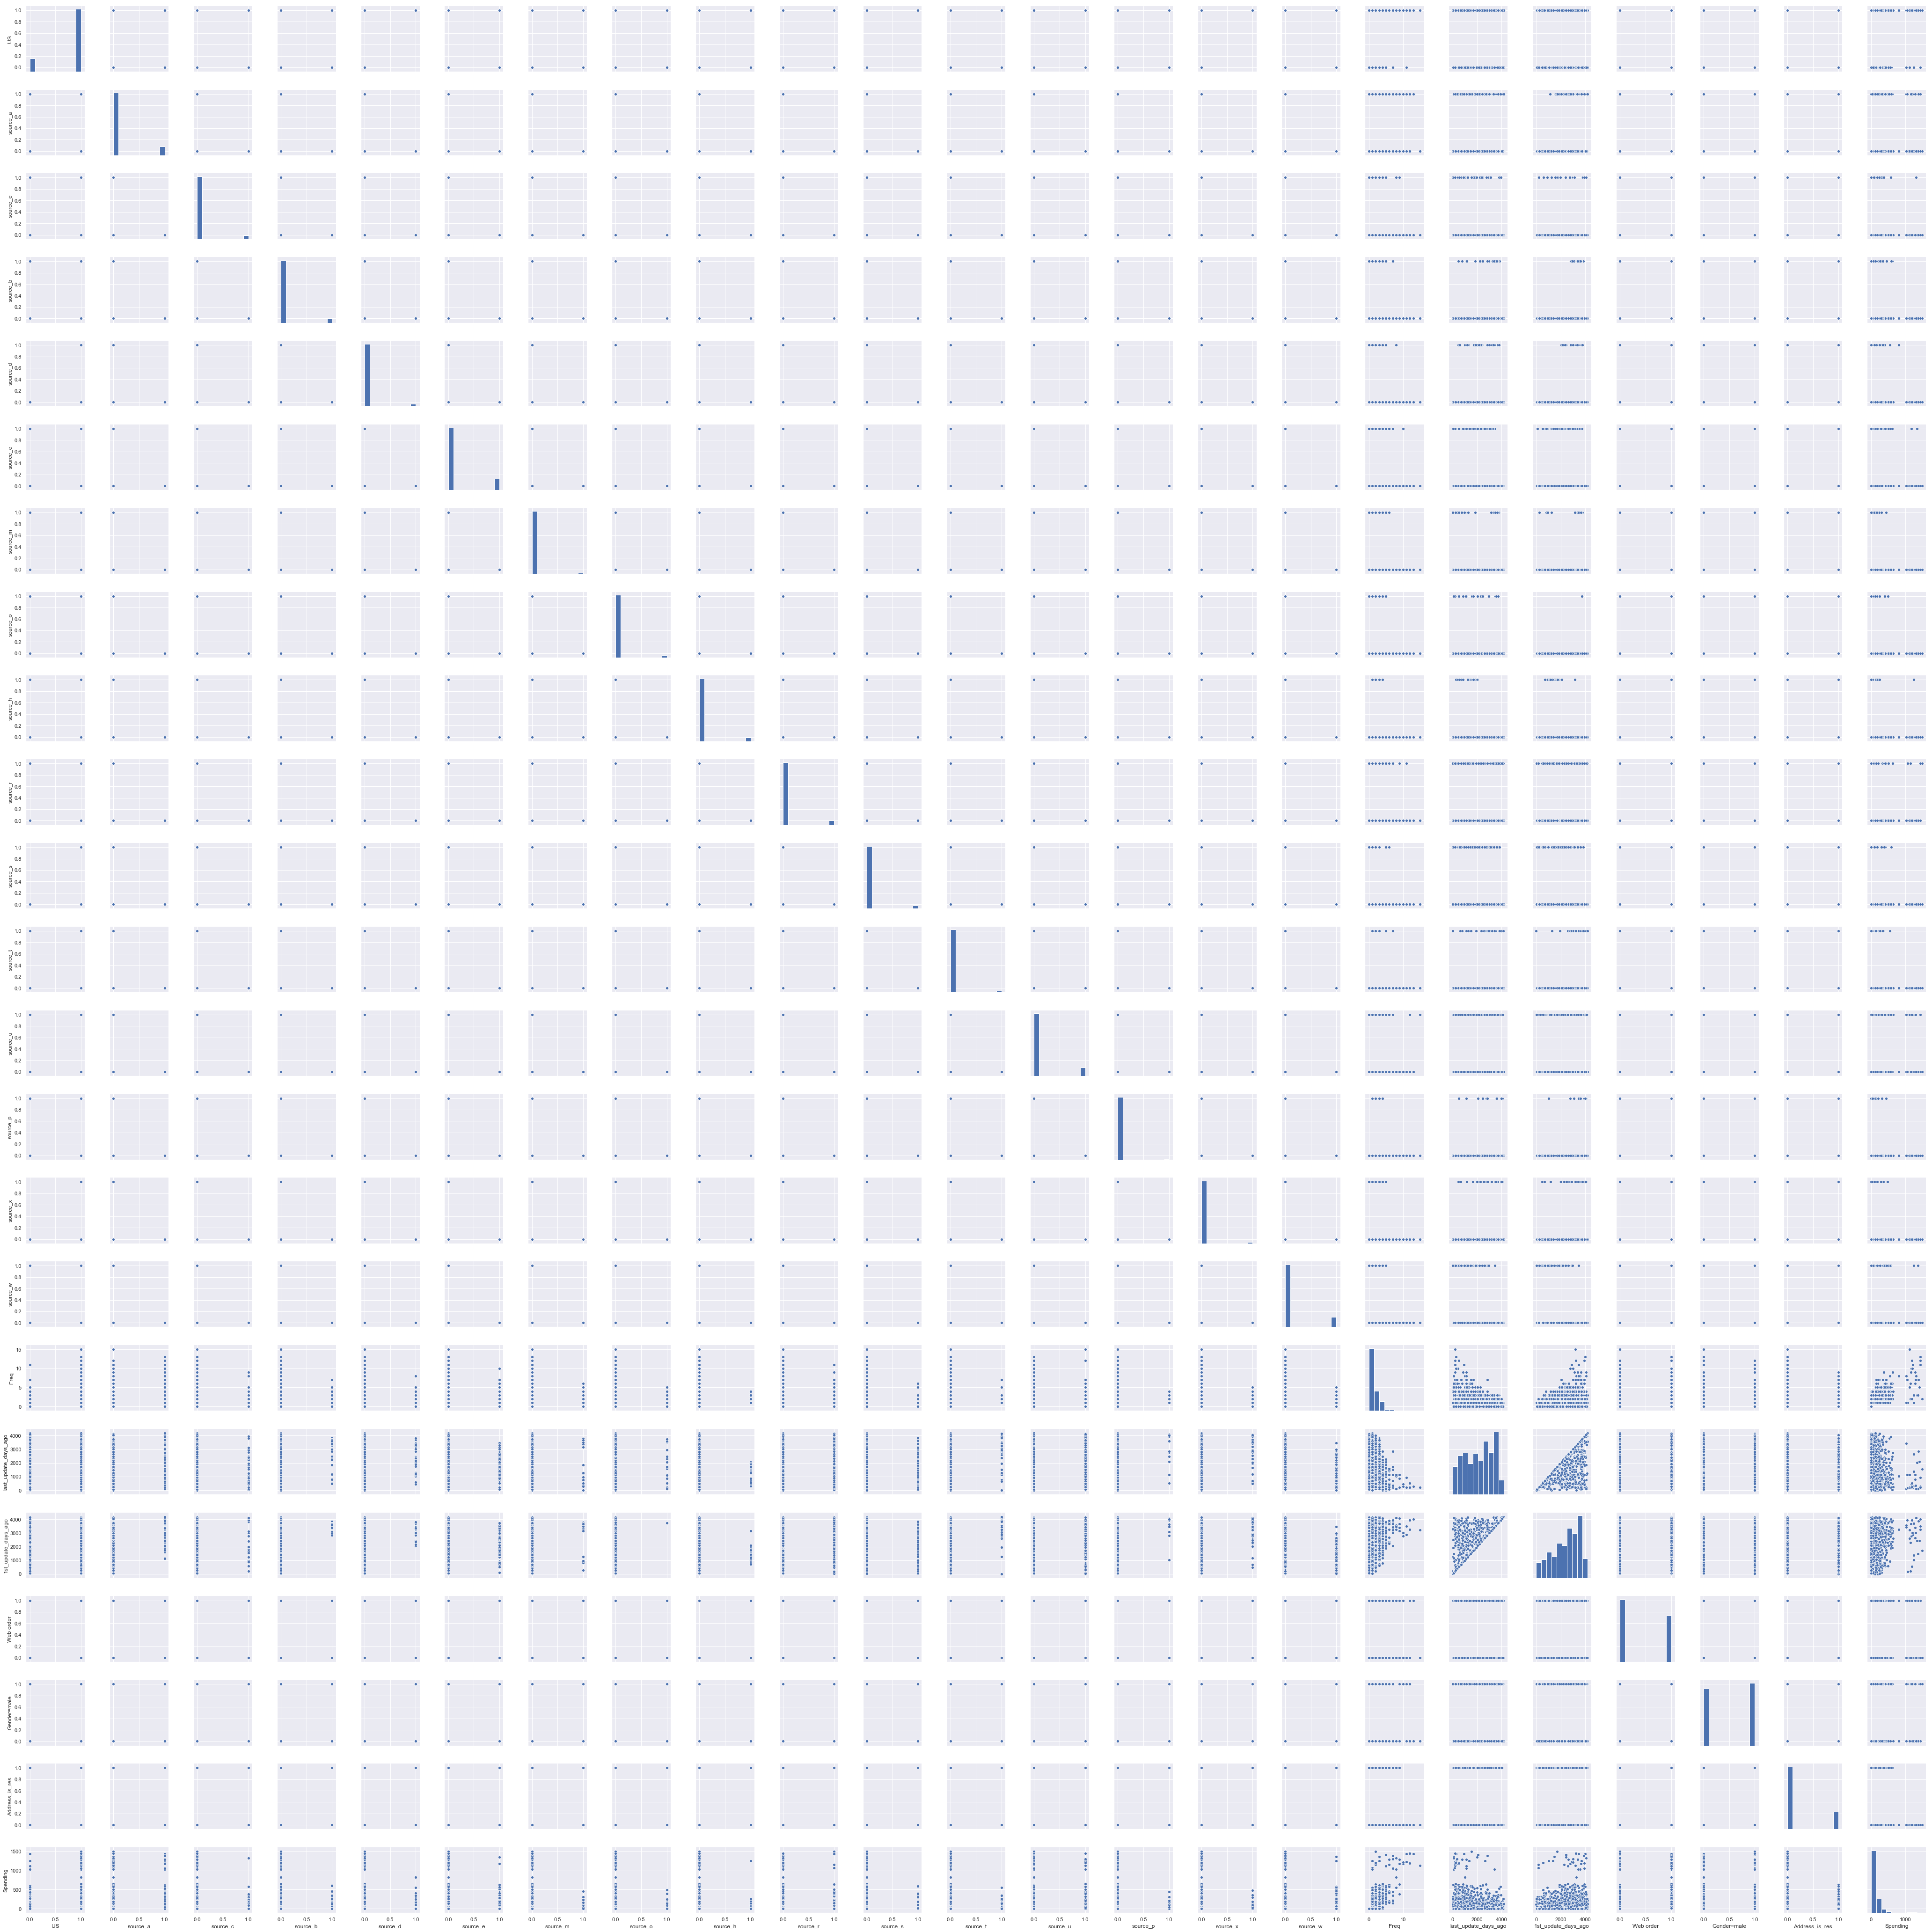

In [32]:
# Seaborn is a Python data visualization library based on matplotlib. 
# Seaborn documentation can be found here https://seaborn.pydata.org/generated/seaborn.set.html
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

sns.pairplot(hw4data, size=2.5)         #df[cols]     # Plot pairwise relationships in a dataset
plt.tight_layout()                            # Tight_layout automatically adjusts subplot params 
                                              # so that the subplot(s) fits in to the figure area.
# plt.savefig('housing_dataset.png', dpi=300) # Saves the figure in our local disk
plt.show()                                    # Display figure


## Heatmap

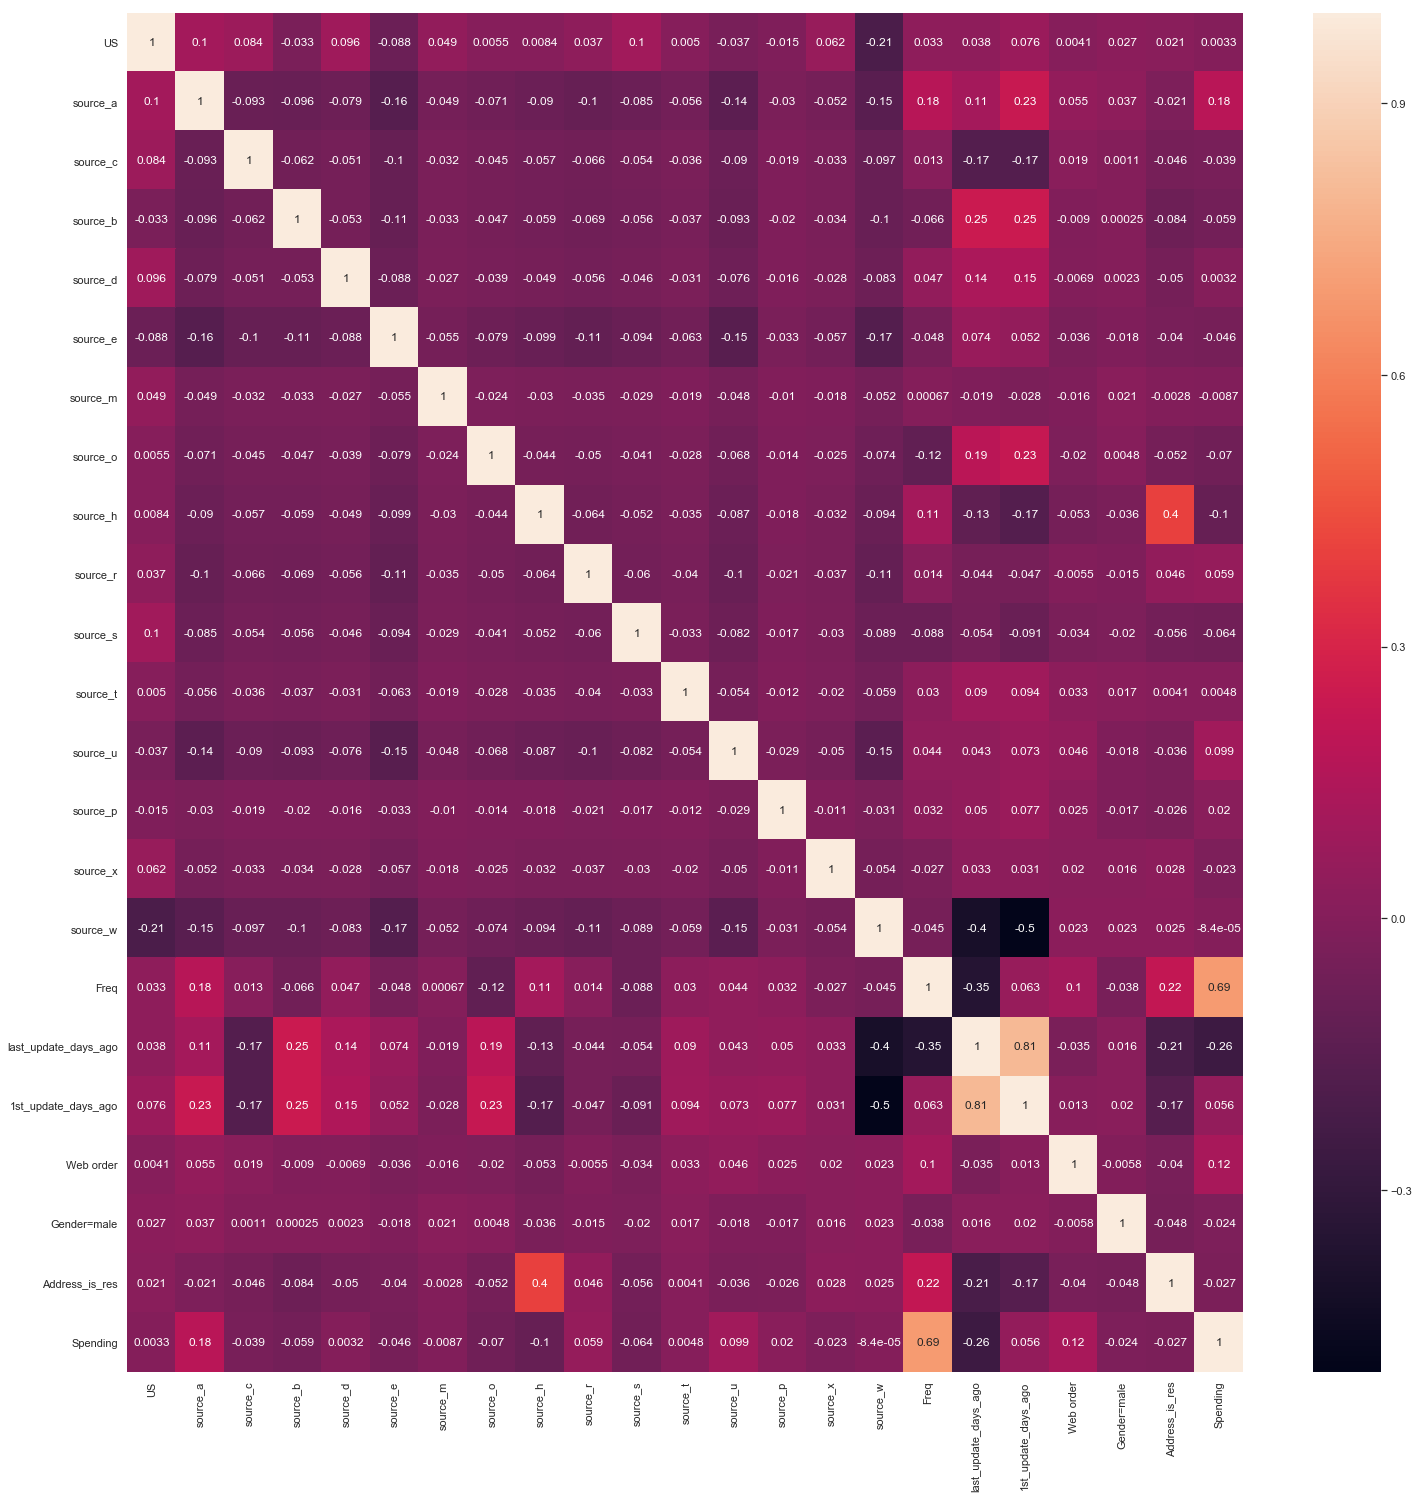

In [34]:
#plot heat map

corrmatrix = hw4data.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(25,25))
plot=sns.heatmap(hw4data[top_correlated_features].corr(),annot=True)

## Isolating Target Variable & Train/Test Split

In [11]:
######################################### Isolating the Target Variable #########################################
# Retrieving Attributes
X = hw4data.iloc[:,:-1].values#or remove .values?
# Retriving Target Variable
y = hw4data.iloc[:,-1].values#or remove .values?
################################# Split the Data into 70% training and 30% test ##################################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)#, stratify=y)

In [12]:
print(X.shape)
print(y.shape)

(2000, 22)
(2000,)


In [13]:
#Creating 10-fold for model Crosss Validation
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)
a_cv = KFold(n_splits=10, shuffle=True, random_state=42)

## Standardizing Variables

In [14]:
################### Standardize Training and Testing X using metrics from Training X #############################
sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.
X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# Initial Models

(a)	(50 points) After exploring the data, build numeric prediction models that predict Spending. Use linear regression, k-NN, and regression tree techniques. Briefly discuss the models you have built. Use cross-validation with 10 folds to estimate the generalization performance. Present the results for each of the three techniques and discuss which one yields the best performance. 

15 points for exploring the data (i.e., descriptive statistics including min max mean and stdv, visualizations, target variable distribution)

10 points for correctly building linear regression model - provide screenshots and explain what you are doing and the corresponding results 

10 points for correctly building k-NN model - provide screenshots and explain what you are doing and the corresponding results

10 points for correctly building regression tree model - provide screenshots and explain what you are doing and the corresponding results 

5 points for discussing which of the three models yields the best performance

## Linear Regression Model

In [15]:
################################### Fit a Linear Regression Model (NTK) ###################################
linmodel = LinearRegression()    # Linear Regression class
linmodel =linmodel.fit(X, y)   # Fit Model to data

print()
cross_val_lin = cross_val_score(linmodel, X=X, y=y, cv=a_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", cross_val_lin.mean(), " +/- ", cross_val_lin.std())
print("CV RMSE Performance: ", np.sqrt(abs(cross_val_lin.mean())), " +/- ", (np.sqrt(abs(cross_val_lin.mean())+cross_val_lin.std())-np.sqrt(abs(cross_val_lin.mean()))))
cross_val_lin = cross_val_score(linmodel, X=X, y=y, cv=a_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", cross_val_lin.mean(), " +/- ", cross_val_lin.std())


CV MSE Performance:  -16320.793058297533  +/-  5104.501643201018
CV RMSE Performance:  127.75285929597636  +/-  18.62095906474876
CV MAE Performance:  -76.9588899818126  +/-  6.563491294080922


## Lasso Regression

In [16]:
######################## Regularized Linear Regression Model - Lasso (NTK) ########################
lasso = Lasso(alpha=0.1,random_state=42)   # Lasso 
lasso = lasso.fit(X, y) # Fit model to data

print()
cross_val_las = cross_val_score(lasso, X=X, y=y, cv=a_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", cross_val_las.mean(), " +/- ", cross_val_las.std())
print("CV RMSE Performance: ", np.sqrt(abs(cross_val_las.mean())), " +/- ", (np.sqrt(abs(cross_val_las.mean())+cross_val_las.std())-np.sqrt(abs(cross_val_las.mean()))))
cross_val_las = cross_val_score(lasso, X=X, y=y, cv=a_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", cross_val_las.mean(), " +/- ", cross_val_las.std())


CV MSE Performance:  -16292.410880330895  +/-  5112.325195466684
CV RMSE Performance:  127.64172860131163  +/-  18.66184646026224
CV MAE Performance:  -76.90887732834692  +/-  6.516866312190457


## Ridge Regression

In [17]:
######################## Regularized Linear Regression Model - Ridge (NTK) ########################

ridge = Ridge(alpha=1.0,random_state=42) # Regularization strength; must be a positive float. 
                         # Larger values specify stronger regularization. 
                         # Alpha corresponds to C^-1 in other linear models such as LogisticRegression
ridge = ridge.fit(X, y) # Fit Model

print()
cross_val_rid = cross_val_score(ridge, X=X, y=y, cv=a_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", cross_val_rid.mean(), " +/- ", cross_val_rid.std())
print("CV RMSE Performance: ", np.sqrt(abs(cross_val_rid.mean())), " +/- ", (np.sqrt(abs(cross_val_rid.mean())+cross_val_rid.std())-np.sqrt(abs(cross_val_rid.mean()))))
cross_val_rid = cross_val_score(ridge, X=X, y=y, cv=a_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", cross_val_rid.mean(), " +/- ", cross_val_rid.std())


#Irrelevant features become very small but not 0


CV MSE Performance:  -16316.402356048007  +/-  5105.889487197948
CV RMSE Performance:  127.73567378006821  +/-  18.627886723377983
CV MAE Performance:  -76.96954012114239  +/-  6.559151935463092


## Regressor Tree

In [18]:
#################################### Regressor Tree - Numeric Prediction (NTK) ####################################

# Decision Tree Regressor
# Supported criteria are “mse” for the mean squared error, which is equal to variance 
# reduction as feature selection criterion and minimizes the L2 loss using the mean of 
# each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s 
# improvement score for potential splits, and “mae” for the mean absolute error, 
# which minimizes the L1 loss using the median of each terminal node.
tree = DecisionTreeRegressor(max_depth=3,random_state=42)
tree = tree.fit(X, y)

print()
cross_val_tree = cross_val_score(tree, X=X, y=y, cv=a_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", cross_val_tree.mean(), " +/- ", cross_val_tree.std())
print("CV RMSE Performance: ", np.sqrt(abs(cross_val_tree.mean())), " +/- ", (np.sqrt(abs(cross_val_tree.mean())+cross_val_tree.std())-np.sqrt(abs(cross_val_tree.mean()))))
cross_val_tree = cross_val_score(tree, X=X, y=y, cv=a_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", cross_val_tree.mean(), " +/- ", cross_val_tree.std())


CV MSE Performance:  -18907.985804927077  +/-  6843.38022165636
CV RMSE Performance:  137.50631187304487  +/-  22.96600981073783
CV MAE Performance:  -79.8288810488542  +/-  9.224992174469058


We need to be careful about choosing an appropriate value for the depth of the tree to not overfit or underfit the data.

## kNN Regressor

In [19]:
##################################### kNN Regressor Example (NTK) #####################################
#3NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn_regressor = knn_regressor.fit(X_std, y)  #fit the model

print()
cross_val_knn = cross_val_score(knn_regressor, X=X_std, y=y, cv=a_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", cross_val_knn.mean(), " +/- ", cross_val_knn.std())
print("CV RMSE Performance: ", np.sqrt(abs(cross_val_knn.mean())), " +/- ", (np.sqrt(abs(cross_val_knn.mean())+cross_val_knn.std())-np.sqrt(abs(cross_val_knn.mean()))))
cross_val_knn = cross_val_score(knn_regressor, X=X_std, y=y, cv=a_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", cross_val_knn.mean(), " +/- ", cross_val_knn.std())


CV MSE Performance:  -22661.044630683333  +/-  7362.640473913422
CV RMSE Performance:  150.53585828859292  +/-  22.737581986011065
CV MAE Performance:  -80.45898166666666  +/-  11.197520258780639


# Feature Engineering

(b)	(50 points) Engage in feature engineering (i.e., create new features based on existing features) to optimize the performance of linear regression, k-NN, and regression tree techniques. Present the results for each of the three techniques (choose the best performing model for each technique in case you try multiple models) and discuss which of the three yields the best performance. Use cross-validation with 10 folds to estimate the generalization performance. Discuss whether and why the generalization performance was improved or not.

10 points for correctly building the new linear regression model and improving the performance as much as possible - provide screenshots and explain what you are doing and the corresponding results 

10 points for correctly building the new k-NN model and improving the performance as much as possible - provide screenshots and explain what you are doing and the corresponding results 

10 points for correctly building the new regression tree model and improving the performance as much as possible - provide screenshots and explain what you are doing and the corresponding results 

20 points for discussing if the generalization performance was improved or not for each of the techniques (linear regression, kNN, and regression tree) and justifying why it was improved or alternatively why it was not improved

- Create some features. Build new models. improving the performance as much as possible. Different models can handle different features in different ways. 
- You only need to show the BEST performing model and discuss what happened. Make sure you are consistent. E.g. you can’t compare feature a from model x and feature y from model y (or was it metric a from model x and metric b for model y).

In [67]:
#Creating a new X for transformations
X_transform=hw4data.iloc[:,:-1]
X_transform.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,3662,3662,1,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2900,2900,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,829,829,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,869,869,0,0,0


In [68]:
#Creating a new variable "day diff" that calculates customer lifetime
X_transform['day_diff']=X_transform['1st_update_days_ago']-X_transform['last_update_days_ago']
X_transform['freqday']=(X_transform['day_diff']/X_transform['Freq']).replace([np.inf, -np.inf], np.nan).fillna(0)

#X_transform.head()

X_transform.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,day_diff,freqday
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,0.068500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,280.500500,106.637891
std,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,0.252665,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,693.030753,299.881252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,44.000000,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,4005.000000,3808.000000


In [69]:
# Generate polynomial and interaction features.
# PolynomialFeatures = Generate a new feature matrix consisting of all polynomial 
# combinations of the features with degree less than or equal to the specified degree. 
# For example, if an input sample is two dimensional and of the form [a, b], the degree-2 
# polynomial features are [1, a, b, a^2, ab, b^2].

squared = PolynomialFeatures(degree=2) # degree = the degree of the polynomial features (default = 2)
cubic = PolynomialFeatures(degree=3) #We know that cube
squaredx = squared.fit_transform(X_transform)
cubicx = cubic.fit_transform(X_transform)

targetfeaturenames = squared.get_feature_names(X_transform.columns)
squaredx = pd.DataFrame(squaredx, columns=targetfeaturenames )
targetfeaturenames = cubic.get_feature_names(X_transform.columns)
cubicx = pd.DataFrame(cubicx, columns=targetfeaturenames )

print(squaredx.shape)
print(cubicx.shape)

(2000, 325)
(2000, 2925)


In [70]:
#remove all columns with only 0s
cubicx = cubicx.loc[:, cubicx.std()!=0]
squaredx = squaredx.loc[:, squaredx.std()!=0]
print(squaredx.shape)
print(cubicx.shape)

(2000, 219)
(2000, 1206)


In [71]:
#remove all duplicate columns (e.g. x and X^2 if x is a binary variable)
cubicx = cubicx.T.drop_duplicates().T
squaredx = squaredx.T.drop_duplicates().T
print(squaredx.shape)
print(cubicx.shape)

(2000, 197)
(2000, 902)


In [94]:
#Finding all columns that are influenced by day variables (numeric)
daycols = [col for col in cubicx.columns if 'day' in col]
daycols[1:10]

['1st_update_days_ago',
 'day_diff',
 'freqday',
 'US last_update_days_ago',
 'US 1st_update_days_ago',
 'US day_diff',
 'US freqday',
 'source_a last_update_days_ago',
 'source_a 1st_update_days_ago']

In [95]:
#seeing most skew variables
cubicx[daycols].skew().sort_values().head()

1st_update_days_ago       -0.489562
US 1st_update_days_ago    -0.296689
last_update_days_ago      -0.187871
US last_update_days_ago   -0.000086
1st_update_days_ago^2      0.154370
dtype: float64

In [72]:
#Get the cuberoot of all day (numeric) related variables
transx = cubicx
#transx[daycols] = np.cbrt(transx[daycols]) #np.log(+0.01)
#transx.isnull().sum().head()

In [73]:
transx.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,Gender=male day_diff^2,Gender=male day_diff freqday,Gender=male freqday^2,Address_is_res day_diff^2,Address_is_res day_diff freqday,Address_is_res freqday^2,day_diff^3,day_diff^2 freqday,day_diff freqday^2,freqday^3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29791.0,14895.5,7447.75,3723.875
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000


In [74]:
#Encode transformations for each model
X_lin_transform = transx
X_tree_transform = transx
X_kNN_transform = transx

In [75]:
#Fuction that allows us to directly get results of the 2econd or 3rd degree of our features
#explore non-linear relationships/patterns in our data

print(X.shape) # Data size after polynomial transformation
print(X_lin_transform.shape)
print(X_tree_transform.shape)
print(X_kNN_transform.shape)

#print(X[1:5,:]) # Preview data after polynomial transformations
#print(X_lin_transform.iloc[1:5,:])
#print(X_tree_transform.iloc[1:5,:])
#print(X_kNN_transform.iloc[1:5,:])

(2000, 22)
(2000, 902)
(2000, 902)
(2000, 902)


## T-Lasso Regression

In [89]:
############################LASSO SFS###########################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lassoSFS = Lasso(alpha=0.1,random_state=42)
lassoSFSfinal = SFS(lassoSFS, k_features = 35, forward = True, #edit k_features
             floating = False, verbose = 2, 
             scoring = 'neg_mean_squared_error', 
             cv=inner_cv, n_jobs = -1)

lassoSFSfinal = lassoSFSfinal.fit(X_lin_transform, y)
pd.DataFrame.from_dict(lassoSFSfinal.get_metric_dict()).T

lassoSFSresult = pd.DataFrame.from_dict(lassoSFSfinal.get_metric_dict()).T
lassoSFSfeatures = lassoSFSresult[lassoSFSresult.avg_score==max(lassoSFSresult.avg_score)].feature_names
lassoSFSfeaturesFinal = list(list(lassoSFSfeatures)[0])
lassoSFSfeaturesFinal = X_lin_transform[lassoSFSfeaturesFinal]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 902 out of 902 | elapsed:    3.8s finished

[2019-10-08 15:49:15] Features: 1/35 -- score: -18305.320251582543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 901 out of 901 | elapsed:    4.0s finished

[2019-10-08 15:49:20] Features: 2/35 -- score: -16521.914754763224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.3s finished

[2019-10-08 15:49:24] Features: 3/35 -- score: -1602

[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:   44.6s finished

[2019-10-08 15:53:57] Features: 21/35 -- score: -14338.467613649947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 881 out of 881 | elapsed:   44.6s finished

[2019-10-08 15:54:42] Features: 22/35 -- score: -14286.811503056615[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 880 out of 880 | elapsed:   48.1s finished

[2

In [90]:
######################## Linear Regression Model - Lasso (NTK) ########################
lasso_SFS = Lasso(alpha=0.1,random_state=42)
lasso_SFS = lasso_SFS.fit(lassoSFSfeaturesFinal, y) # Fit model to data

lassoSFS_CV = cross_val_score(lasso_SFS, X=lassoSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", lassoSFS_CV.mean(), " +/- ", lassoSFS_CV.std())
print("CV RMSE Performance: ", np.sqrt(abs(lassoSFS_CV.mean())), " +/- ", (np.sqrt(abs(lassoSFS_CV.mean())+lassoSFS_CV.std())-np.sqrt(abs(lassoSFS_CV.mean()))))
lassoSFS_CV = cross_val_score(lasso_SFS, X=lassoSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", lassoSFS_CV.mean(), " +/- ", lassoSFS_CV.std())

CV MSE Performance:  -13919.356186854382  +/-  4614.861346863342
CV RMSE Performance:  117.98032118473988  +/-  18.16011194854248
CV MAE Performance:  -69.57585491201988  +/-  6.306007824923059


In [108]:
lassoSFSfeaturesFinal.columns

Index(['source_c', 'Freq', 'US 1st_update_days_ago',
       'source_c 1st_update_days_ago', 'source_u Gender=male',
       'source_w Gender=male', 'Freq 1st_update_days_ago',
       'Freq Address_is_res', 'last_update_days_ago Address_is_res',
       'Web order Address_is_res', 'US source_u freqday',
       'US source_w 1st_update_days_ago', 'US Freq last_update_days_ago',
       'US Freq Web order', 'US Web order Address_is_res',
       'source_a Freq last_update_days_ago', 'source_a Web order day_diff',
       'source_c Freq Web order', 'source_c Freq Gender=male',
       'source_d freqday^2', 'source_e Freq Gender=male',
       'source_e last_update_days_ago day_diff',
       'source_o Gender=male day_diff', 'source_h Freq last_update_days_ago',
       'source_r Web order Gender=male', 'source_u Web order Address_is_res',
       'source_u Web order day_diff', 'Freq^2 last_update_days_ago',
       'Freq last_update_days_ago Web order', 'Freq Web order Address_is_res',
       'last_up

## T-Regressor Tree

In [29]:
############################Regressor Tree SFS###########################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
treeSFS = DecisionTreeRegressor(max_depth=3,random_state=42)
treeSFSfinal = SFS(treeSFS, k_features = 25, forward = True, #edit k_features
             floating = False, verbose = 2, 
             scoring = 'neg_mean_squared_error', 
       1      cv=inner_cv, n_jobs = -1)

treeSFSfinal = treeSFSfinal.fit(X_tree_transform, y)
pd.DataFrame.from_dict(treeSFSfinal.get_metric_dict()).T

treeSFSresult = pd.DataFrame.from_dict(treeSFSfinal.get_metric_dict()).T
treeSFSfeatures = treeSFSresult[treeSFSresult.avg_score==max(treeSFSresult.avg_score)].feature_names
treeSFSfeaturesFinal = list(list(treeSFSfeatures)[0])
treeSFSfeaturesFinal = X_tree_transform[treeSFSfeaturesFinal]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 713 out of 713 | elapsed:    3.8s finished

[2019-10-08 14:00:56] Features: 1/25 -- score: -18730.26051681899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 712 out of 712 | elapsed:    4.2s finished

[2019-10-08 14:01:01] Features: 2/25 -- score: -17600.869658898766[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 637 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 711 out of 711 | elapsed:    4.1s finished

[2019-10-08 14:01:05] Features: 3/25 -- score: -17183

[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 676 out of 691 | elapsed:    7.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 691 out of 691 | elapsed:    7.9s finished

[2019-10-08 14:03:22] Features: 23/25 -- score: -16810.24975622045[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 690 out of 690 | elapsed:    7.6s finished

[2019-10-08 14:03:30] Features: 24/25 -- score: -16810.249756220448[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 689 out of 689 | elapsed:    7.7s finished

[2019-10-08 14:03:39] Features: 25/25 -- score

In [30]:
#################################### Regressor Tree - Numeric Prediction (NTK) ####################################
tree_SFS = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_SFS = tree_SFS.fit(treeSFSfeaturesFinal, y)

treeSFS_CV = cross_val_score(tree_SFS, X=treeSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", treeSFS_CV.mean(), " +/- ", treeSFS_CV.std())
print("CV RMSE Performance: ", np.sqrt(abs(treeSFS_CV.mean())), " +/- ", (np.sqrt(abs(treeSFS_CV.mean())+treeSFS_CV.std())-np.sqrt(abs(treeSFS_CV.mean()))))
treeSFS_CV = cross_val_score(tree_SFS, X=treeSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", treeSFS_CV.mean(), " +/- ", treeSFS_CV.std())

CV MSE Performance:  -16810.249756220455  +/-  5694.209432160333
CV RMSE Performance:  129.65434723224845  +/-  20.36051599263598
CV MAE Performance:  -75.411174580852  +/-  8.287117672517184


In [109]:
treeSFSfeaturesFinal.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_r', 'source_t', 'source_x', 'source_w',
       'Freq', 'Web order', 'US source_c', 'US source_b',
       'source_a 1st_update_days_ago', 'source_x 1st_update_days_ago',
       'US source_m Address_is_res', 'source_p Gender=male day_diff',
       'Freq^2 last_update_days_ago', 'Freq^2 1st_update_days_ago',
       'Freq Web order Address_is_res', 'Freq Gender=male day_diff'],
      dtype='object')

## T-kNN Regression

In [79]:
################### Standardizing Transformed X for kNN #############################
sc = StandardScaler()
sc.fit(X_kNN_transform)
X_kNN_trans_std = sc.transform(X_kNN_transform)
X_kNN_trans_std = pd.DataFrame(X_kNN_trans_std, columns=X_kNN_transform.columns)

In [85]:
###############################kNN SFS##################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knnSFS = neighbors.KNeighborsRegressor(n_neighbors = 3)
knnSFSfinal = SFS(knnSFS, k_features = 25, forward = True, #edit k_features
             floating = False, verbose = 2, 
             scoring = 'neg_mean_squared_error', 
             cv=inner_cv, n_jobs = -1)

knnSFSfinal = knnSFSfinal.fit(X_kNN_trans_std, y)
pd.DataFrame.from_dict(knnSFSfinal.get_metric_dict()).T

knnSFSresult = pd.DataFrame.from_dict(knnSFSfinal.get_metric_dict()).T
knnSFSfeatures = knnSFSresult[knnSFSresult.avg_score==max(knnSFSresult.avg_score)].feature_names
knnSFSfeaturesFinal = list(list(knnSFSfeatures)[0])
knnSFSfeaturesFinal = X_kNN_trans_std[knnSFSfeaturesFinal]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 887 out of 902 | elapsed:   15.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 902 out of 902 | elapsed:   15.5s finished

[2019-10-08 15:28:09] Features: 1/25 -- score: -22010.852223894442[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 886 out of 901 | elapsed:   11.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 901 out of 901 | elapsed:   11.8s finished

[2019-10-08 15:28:21] Features: 2/25 -- score: -20621.763574194443[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 885 out of 885 | elapsed:   37.3s finished

[2019-10-08 15:35:12] Features: 18/25 -- score: -15603.098088255554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 884 out of 884 | elapsed:   33.2s finished

[2019-10-08 15:35:45] Features: 19/25 -- score: -15557.491200644441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   25.9s
[Parallel(n_

In [86]:
##################################### kNN Regressor Example (NTK) #####################################
knn_SFS = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn_SFS = knn_SFS.fit(knnSFSfeaturesFinal, y)  #fit the model

KnnSFS_CV = cross_val_score(knn_SFS, X=knnSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_squared_error") #or X=X_train and y=y_train?
print("CV MSE Performance: ", KnnSFS_CV.mean(), " +/- ", KnnSFS_CV.std())
print("CV RMSE Performance: ", np.sqrt(abs(KnnSFS_CV.mean())), " +/- ", (np.sqrt(abs(KnnSFS_CV.mean())+KnnSFS_CV.std())-np.sqrt(abs(KnnSFS_CV.mean()))))
KnnSFS_CV = cross_val_score(knn_SFS, X=knnSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_absolute_error")
print("CV MAE Performance: ", KnnSFS_CV.mean(), " +/- ", KnnSFS_CV.std())

CV MSE Performance:  -15528.760769800001  +/-  4006.0541060065852
CV RMSE Performance:  124.61444847929954  +/-  15.152553619931979
CV MAE Performance:  -71.93142666666667  +/-  5.039852740712433


In [110]:
knnSFSfeaturesFinal.columns

Index(['source_m Freq', 'source_o Address_is_res', 'US source_m Freq',
       'US source_r freqday', 'source_a Web order Address_is_res',
       'source_c Freq Gender=male', 'source_c Web order Address_is_res',
       'source_c Address_is_res day_diff', 'source_b last_update_days_ago^2',
       'source_b last_update_days_ago day_diff',
       'source_b 1st_update_days_ago^2',
       'source_e last_update_days_ago Gender=male', 'source_m Freq^2',
       'source_o Freq last_update_days_ago', 'source_o Freq Address_is_res',
       'source_h Freq Gender=male', 'source_h Freq Address_is_res',
       'source_h 1st_update_days_ago Web order',
       'source_h Address_is_res freqday', 'source_s Freq Address_is_res',
       'Freq^2 Address_is_res', 'Freq^2 day_diff',
       'Freq 1st_update_days_ago Address_is_res',
       'last_update_days_ago Address_is_res freqday',
       'last_update_days_ago day_diff^2'],
      dtype='object')

# Parameter Tuning

(c)	(35 points) Engage in parameter tuning to optimize the performance of linear regression, k-NN, and regression tree techniques. Use cross-validations with 10 folds to estimate the generalization performance. Present the results for each of the three techniques and discuss which one yields the best performance.

10 points for correctly optimizing at least two parameters for linear regression model and improving the performance as much as possible - provide screenshots and explain what you are doing and the corresponding results 

10 points for correctly optimizing at least two parameters for linear k-NN model and improving the performance as much as possible - provide screenshots and explain what you are doing and the corresponding results

10 points for correctly optimizing at least two parameters for linear regression tree model and improving the performance as much as possible - provide screenshots and explain what you are doing and the corresponding results

5 points for discussing which of the three models yields the best performance

## Lasso Param Tuning

In [101]:
from sklearn.linear_model import Lasso # Lasso Regression class
 # Lasso                   # alpha : constant that multiplies the L1 term. 
                           # Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, 
                           # solved by the LinearRegression object.

gs_lr = GridSearchCV(estimator=Lasso(random_state=42),
                  param_grid=[{'alpha': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                               'fit_intercept': ['True', 'False']}],
                  scoring='neg_mean_squared_error',
                  cv=inner_cv, n_jobs=4)

gs_lr = gs_lr.fit(lassoSFSfeaturesFinal, y)
print("\n Linear Regression (Lasso) Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=lassoSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_squared_error")
print("Nested CV MSE:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())
print("Nested CV RMSE: ", np.sqrt(abs(nested_score_gs_lr.mean())), " +/- ", (np.sqrt(abs(nested_score_gs_lr.mean())+nested_score_gs_lr.std())-np.sqrt(abs(nested_score_gs_lr.mean()))))

#feature selection, some of the features coefficients become 0


 Linear Regression (Lasso) Parameter Tuning
Non-nested CV F1-Score:  -13908.994802753288
Optimal Parameter:  {'alpha': 0.001, 'fit_intercept': 'True'}
Optimal Estimator:  Lasso(alpha=0.001, copy_X=True, fit_intercept='True', max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)
Nested CV MSE: -13909.745085337738  +/-  4555.392573989813
Nested CV RMSE:  117.93958235188785  +/-  17.946905789235103


## Tree Param Tuning

In [102]:
gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=42, criterion= 'mse'), 
                     param_grid=[{'max_depth': [1,2,3,4,5],
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                     scoring="neg_mean_squared_error", # Specifying multiple metrics for evaluation
                     cv=inner_cv, n_jobs=4) #GridSearchCV

gs_dt = gs_dt.fit(treeSFSfeaturesFinal,y)
print("\nRegressor Tree Parameter Tuning")
print("Non-nested RMSE Performance: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_dt = cross_val_score(gs_dt, X=treeSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_squared_error")
print("Nested CV MSE: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())
print("Nested CV RMSE: ", np.sqrt(abs(nested_score_gs_dt.mean())), " +/- ", (np.sqrt(abs(nested_score_gs_dt.mean())+nested_score_gs_dt.std())-np.sqrt(abs(nested_score_gs_dt.mean()))))



Regressor Tree Parameter Tuning
Non-nested RMSE Performance:  -16810.24975622045
Optimal Parameter:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
Nested CV MSE:  -17235.934483967627  +/-  5594.700815155602
Nested CV RMSE:  131.28569794142706  +/-  19.812400322989305


## kNN Param Tuning

In [103]:
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsRegressor( 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15],
                               'weights':['uniform','distance'],
                               'p':[1,2,3]}],
                  scoring="neg_mean_squared_error",
                  cv=inner_cv, n_jobs=4)

gs_knn = gs_knn.fit(knnSFSfeaturesFinal,y)  #X_std
print("\n kNN Parameter Tuning")
print("Non-nested RMSE Performance: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = cross_val_score(gs_knn, X=knnSFSfeaturesFinal, y=y, cv=outer_cv, scoring="neg_mean_squared_error")
print("Nested CV MSE: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())
print("Nested CV RMSE: ", np.sqrt(abs(nested_score_gs_knn.mean())), " +/- ", (np.sqrt(abs(nested_score_gs_knn.mean())+nested_score_gs_knn.std())-np.sqrt(abs(nested_score_gs_knn.mean()))))



 kNN Parameter Tuning
Non-nested RMSE Performance:  -15528.7607698
Optimal Parameter:  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
Nested CV MSE:  -17460.102614695345  +/-  4924.116377933236
Nested CV RMSE:  132.13668156380857  +/-  17.47688397297216
